### <center> CHURN PREDICTION </center>

##### IMPORT LIBRARY PACKAGES

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, fbeta_score
from sklearn.metrics import confusion_matrix

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Other packages
from tabulate import tabulate
import os, pickle

import warnings
warnings.filterwarnings('ignore')

import pickle

##### LOAD ALL THE DATASET

In [8]:
train_df = pd.read_csv("Train (1).csv")
test_df = pd.read_csv("Test (1).csv")
VariableDefinitions_df = pd.read_csv("VariableDefinitions.csv")
SampleSubmission_df = pd.read_csv("SampleSubmission.csv")

##### DISPLAY THE DATASET

In [9]:
train_df.head()


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35.0,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2.0,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22.0,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6.0,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60.0,"Data:1000F=2GB,30d",4.0


In [10]:
test_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35.0,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2.0,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22.0,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6.0,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60.0,"Data:1000F=2GB,30d",4.0


##### DATA OVERVIEW

In [12]:
print("There is a total number of rows and columns is",train_df.shape,"respectively")

There is a total number of rows and columns is (165252, 19) respectively


##### CHECK FOR MISSING VALUES

In [13]:
train_df.isna().sum()

user_id                0
REGION             65419
TENURE                 0
MONTANT            58259
FREQUENCE_RECH     58259
REVENUE            55708
ARPU_SEGMENT       55708
FREQUENCE          55708
DATA_VOLUME        81643
ON_NET             60334
ORANGE             68727
TIGO               98987
ZONE1             152305
ZONE2             154645
MRG                    1
REGULARITY             1
TOP_PACK           69461
FREQ_TOP_PACK      69461
CHURN                  1
dtype: int64

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165252 entries, 0 to 165251
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         165252 non-null  object 
 1   REGION          99833 non-null   object 
 2   TENURE          165252 non-null  object 
 3   MONTANT         106993 non-null  float64
 4   FREQUENCE_RECH  106993 non-null  float64
 5   REVENUE         109544 non-null  float64
 6   ARPU_SEGMENT    109544 non-null  float64
 7   FREQUENCE       109544 non-null  float64
 8   DATA_VOLUME     83609 non-null   float64
 9   ON_NET          104918 non-null  float64
 10  ORANGE          96525 non-null   float64
 11  TIGO            66265 non-null   float64
 12  ZONE1           12947 non-null   float64
 13  ZONE2           10607 non-null   float64
 14  MRG             165251 non-null  object 
 15  REGULARITY      165251 non-null  float64
 16  TOP_PACK        95791 non-null   object 
 17  FREQ_TOP_P

In [17]:
train_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,106993.000000,106993.000000,109544.000000,109544.000000,109544.000000,8.360900e+04,104918.000000,96525.000000,66265.000000,12947.000000,10607.000000,165251.000000,95791.000000,165251.000000
mean,5515.949109,11.487565,5483.692580,1827.903226,13.890446,3.413922e+03,276.742218,94.635069,22.796031,8.680312,8.394739,27.967328,9.193035,0.188870
std,7132.881895,13.215078,7188.736826,2396.241874,14.608550,1.362449e+04,891.500152,202.446695,62.234362,37.169089,50.568457,22.285815,12.088760,0.391407
min,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000e+00,4.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,2.550000e+02,27.000000,28.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000
75%,7300.000000,15.000000,7300.000000,2433.000000,19.000000,2.877000e+03,156.000000,98.000000,20.000000,4.000000,5.000000,51.000000,12.000000,0.000000
max,286500.000000,114.000000,323541.000000,107847.000000,91.000000,1.352304e+06,29861.000000,6721.000000,3486.000000,767.000000,3697.000000,62.000000,592.000000,1.000000


array([[<AxesSubplot: title={'center': 'MONTANT'}>,
        <AxesSubplot: title={'center': 'FREQUENCE_RECH'}>,
        <AxesSubplot: title={'center': 'REVENUE'}>,
        <AxesSubplot: title={'center': 'ARPU_SEGMENT'}>],
       [<AxesSubplot: title={'center': 'FREQUENCE'}>,
        <AxesSubplot: title={'center': 'DATA_VOLUME'}>,
        <AxesSubplot: title={'center': 'ON_NET'}>,
        <AxesSubplot: title={'center': 'ORANGE'}>],
       [<AxesSubplot: title={'center': 'TIGO'}>,
        <AxesSubplot: title={'center': 'ZONE1'}>,
        <AxesSubplot: title={'center': 'ZONE2'}>,
        <AxesSubplot: title={'center': 'REGULARITY'}>],
       [<AxesSubplot: title={'center': 'FREQ_TOP_PACK'}>,
        <AxesSubplot: title={'center': 'CHURN'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

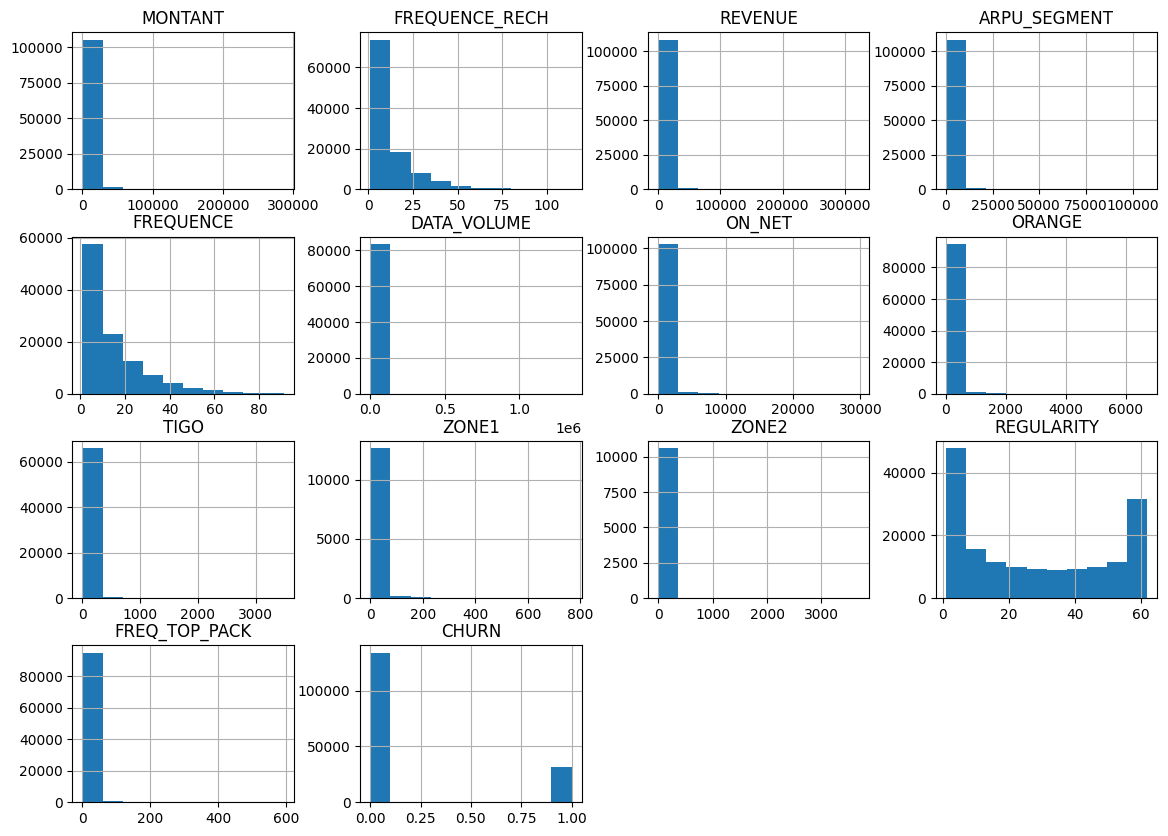

In [19]:
train_df.hist(figsize = (14,10))